## Observations and Insights 

Observations and Inferences about the figures and tables below
1. The mean and median tumor volume are very similar which shows that there isn't much outliers in the data. This fact iss reflected in the box plot that displayed the final tumor volume for the top 4 drug. 
2. There is a strong correlation between the weight and tumor volume of a mouse.
3. The top two most effective drug regimens were used more ocnsistently across the complete timepoint compared to the other drug regimens and perhaps that can be a reason for being more effective. For example, mouse chosen for the line plot below received treatment from the second most effective drug. However, as the plot shows, if the testing had stopped after the first three or seven timpoints, the effectiveness would not be as promising. 

In [35]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
pd.set_option('display.max_rows', 9999)
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single dataset
combined_data=pd.merge(left=mouse_metadata, right=study_results, how="outer")
combined_data=combined_data.rename(columns={"Age_months":"Age (Months)"})

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age (Months),Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [36]:
# Checking the number of mice.
mice_count= combined_data["Mouse ID"].value_counts()
mice_count.count()

249

In [37]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
combined_data["Duplicate"]=combined_data.duplicated(subset=['Mouse ID','Timepoint'])
combined_data
test = combined_data.loc[combined_data["duplicate"]==True]
test

,Mouse ID,Drug Regimen,Sex,Age (Months),Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,duplicate
909,g989,Propriva,Female,21,26,0,45.000000,0,True
911,g989,Propriva,Female,21,26,5,47.570392,0,True
913,g989,Propriva,Female,21,26,10,49.880528,0,True
915,g989,Propriva,Female,21,26,15,53.442020,0,True
917,g989,Propriva,Female,21,26,20,54.657650,1,True


In [ ]:
# Optional: Get all the data for the duplicate mouse ID. 


In [39]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_data = combined_data.loc[combined_data["Mouse ID"]!="g989"]
#combined_data = combined_data.sort_values("Drug Regimen")
combined_data

,Mouse ID,Drug Regimen,Sex,Age (Months),Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,duplicate
0,k403,Ramicane,Male,21,16,0,45.000000,0,False
1,k403,Ramicane,Male,21,16,5,38.825898,0,False
2,k403,Ramicane,Male,21,16,10,35.014271,1,False
3,k403,Ramicane,Male,21,16,15,34.223992,1,False
4,k403,Ramicane,Male,21,16,20,32.997729,1,False
5,k403,Ramicane,Male,21,16,25,33.464577,1,False
6,k403,Ramicane,Male,21,16,30,31.099498,1,False
7,k403,Ramicane,Male,21,16,35,26.546993,1,False
8,k403,Ramicane,Male,21,16,40,24.365505,1,False
9,k403,Ramicane,Male,21,16,45,22.050126,1,False


In [40]:
# Checking the number of mice in the clean DataFrame.
mice_count= combined_data["Mouse ID"].value_counts()
mice_count.count()

248

## Summary Statistics

In [41]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen = combined_data.groupby("Drug Regimen")
regimen_mean = regimen["Tumor Volume (mm3)"].mean()
regimen_median = regimen["Tumor Volume (mm3)"].median()
regimen_var = regimen["Tumor Volume (mm3)"].var()
regimen_std = regimen["Tumor Volume (mm3)"].std()
regimen_sem = regimen["Tumor Volume (mm3)"].sem()

# This method is the most straighforward, creating multiple series and putting them all together at the end.
Summary_Table_DF = pd.DataFrame({"Mean":regimen_mean, "Median":regimen_median, "Variance":regimen_var, 
                                "Standard Deviation":regimen_std, "SEM":regimen_sem})
Summary_Table_DF

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [42]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
Summary_Table2_DF = regimen.agg({"Tumor Volume (mm3)":['mean', 'median', 'var','std','sem']})
Summary_Table2_DF.rename(columns={'mean':'Mean', 'median':'Median', 'var':'Variance', 
                                        'std':'Standard Deviation','sem':'SEM'})


Tumor Volume (mm3)                                           \
                           Mean     Median   Variance Standard Deviation   
Drug Regimen                                                               
Capomulin             40.675741  41.557809  24.947764           4.994774   
Ceftamin              52.591172  51.776157  39.290177           6.268188   
Infubinol             52.884795  51.820584  43.128684           6.567243   
Ketapril              55.235638  53.698743  68.553577           8.279709   
Naftisol              54.331565  52.509285  66.173479           8.134708   
Placebo               54.033581  52.288934  61.168083           7.821003   
Propriva              52.320930  50.446266  43.852013           6.622085   
Ramicane              40.216745  40.673236  23.486704           4.846308   
Stelasyn              54.233149  52.431737  59.450562           7.710419   
Zoniferol             53.236507  51.818479  48.533355           6.966589   

                        
                   SEM  
Drug Regimen            
Capomulin     0.329346  
Ceftamin      0.469821  
Infubinol     0.492236  
Ketapril      0.603860  
Naftisol      0.596466  
Placebo       0.581331  
Propriva      0.544332  
Ramicane      0.320955  
Stelasyn      0.573111  
Zoniferol     0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice')

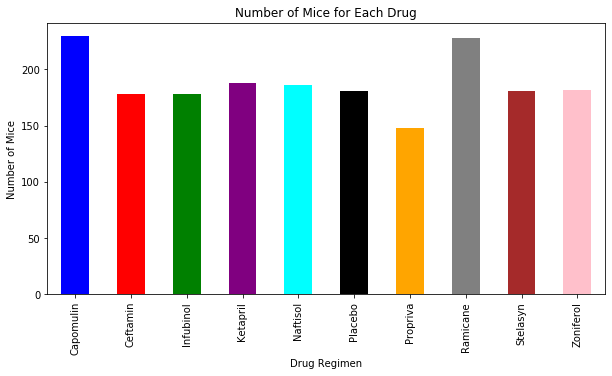

In [43]:
mouse_combined_data = combined_data.groupby('Drug Regimen')
mouse_combined_data_count=mouse_combined_data["Mouse ID"].count()
ax=mouse_combined_data_count.plot(kind='bar', title="Number of Mice for Each Drug", figsize=(10,5),
                               color=['blue','red','green','purple','aqua','black','orange','gray','brown','pink'])
ax.set_ylabel("Number of Mice")

Text(0.5, 0, 'Drug Regimen')

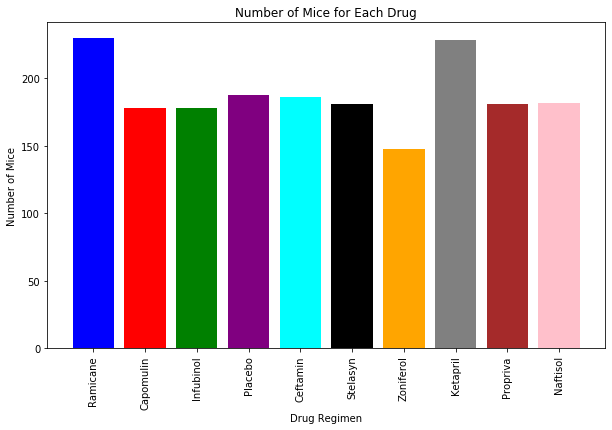

In [44]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
x_axis = np.arange(len(mouse_combined_data))
tick_locations=[value for value in x_axis]
Drug_Regimen = combined_data["Drug Regimen"].unique()
# Show the chart
plt.figure(figsize=(10,6))
plt.bar(x_axis, mouse_combined_data_count,
        color=['blue','red','green','purple','aqua','black','orange','gray','brown','pink'])
plt.xticks(tick_locations, Drug_Regimen, rotation="vertical")
plt.title("Number of Mice for Each Drug")
plt.ylabel("Number of Mice")
plt.xlabel("Drug Regimen")


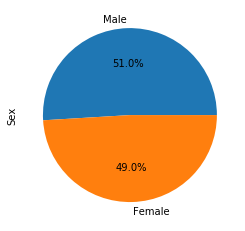

In [45]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
Sex_DF = combined_data['Sex'].value_counts()
Sex_DF.plot(kind='pie',y='Sex',autopct="%1.1f%%")

([<matplotlib.patches.Wedge at 0x1d4b7072508>,
 [Text(-0.03308201408261547, 1.0995024239828841, 'Male'),
  Text(0.033082014082615095, -1.0995024239828841, 'Female')],
 [Text(-0.01804473495415389, 0.5997285948997549, '51.0%'),
  Text(0.018044734954153686, -0.5997285948997549, '49.0%')])

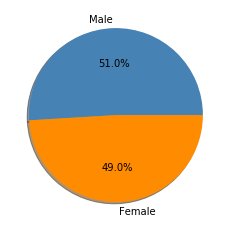

In [46]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
Sex_DF = combined_data['Sex'].value_counts()
labels = ['Male', 'Female']
colors=['steelblue','darkorange']
plt.pie(Sex_DF, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True)

## Quartiles, Outliers and Boxplots

In [63]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

top4_data = combined_data.loc[(combined_data["Drug Regimen"]=="Capomulin")| (combined_data["Drug Regimen"]=="Ramicane") |
                              (combined_data["Drug Regimen"]=="Infubinol") |(combined_data["Drug Regimen"]=="Ceftamin")]

# Start by getting the last (greatest) timepoint for each mouse
max_tumor = top4_data.groupby(["Mouse ID"])['Timepoint'].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_data = pd.merge(left=max_tumor, right=top4_data,on=['Mouse ID','Timepoint'],how="left")
merged_data.head()


,Mouse ID,Timepoint,Drug Regimen,Sex,Age (Months),Weight (g),Tumor Volume (mm3),Metastatic Sites,duplicate
0,a203,45,Infubinol,Female,20,23,67.973419,2,False
1,a251,45,Infubinol,Female,21,25,65.525743,1,False
2,a275,45,Ceftamin,Female,20,28,62.999356,3,False
3,a411,45,Ramicane,Male,3,22,38.407618,1,False
4,a444,45,Ramicane,Female,10,25,43.047543,0,False


In [60]:
top4_data.count()

Mouse ID              814
Drug Regimen          814
Sex                   814
Age (Months)          814
Weight (g)            814
Timepoint             814
Tumor Volume (mm3)    814
Metastatic Sites      814
duplicate             814
dtype: int64

In [50]:
# Put treatments into a list for for loop (and later for plot labels)
treatments_list=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol=[]


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments_list:
        
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_df=merged_data.loc[merged_data["Drug Regimen"]==drug, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol.append(drug_df)
    quartiles = drug_df.quantile([.25,.50,.75])
    lowerq= quartiles[.25]
    upperq= quartiles[.75]
    iqr=upperq-lowerq
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)
   
    # Determine outliers using upper and lower bounds
    print(f"Values below {lower_bound} and above {upper_bound} could be outliers for drug regimen {drug}.")


Values below 20.7 and above 51.83 could be outliers for drug regimen Capomulin.
Values below 17.91 and above 54.31 could be outliers for drug regimen Ramicane.
Values below 36.83 and above 82.74 could be outliers for drug regimen Infubinol.
Values below 25.36 and above 87.67 could be outliers for drug regimen Ceftamin.


In [59]:
tumor_vol[2].count()

25

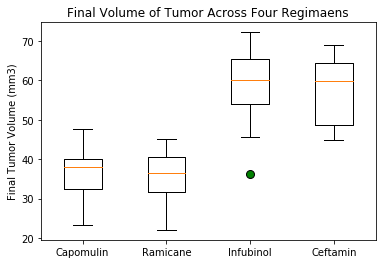

In [51]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
flierprops=dict(marker='o', markerfacecolor='green', markersize=8,
                  linestyle='none')
x_axis=np.arange(len(tumor_vol))+ 1
tick_location= [value for value in x_axis]
fig1, ax1 = plt.subplots()
ax1.set_title('Final Volume of Tumor Across Four Regimaens')
ax1.set_ylabel('Final Tumor Volume (mm3)')
plt.boxplot(tumor_vol, flierprops=flierprops)
plt.xticks(tick_location, treatments_list)
plt.show()

## Line and Scatter Plots

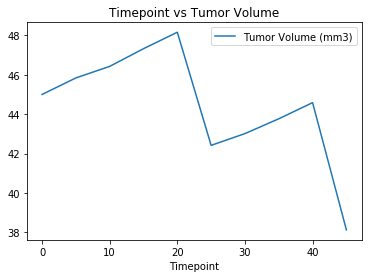

In [52]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_df = combined_data.loc[combined_data["Drug Regimen"]=="Capomulin"]
capomulin_mouse_df = capomulin_df.loc[capomulin_df["Mouse ID"]=="j119"]
capomulin_mouse_df = capomulin_mouse_df.sort_values("Timepoint")
capomulin_mouse_df.plot(kind='line', x="Timepoint", y="Tumor Volume (mm3)", title ="Timepoint vs Tumor Volume")


Text(0, 0.5, 'Mouse Tumor Volume (mm3)')

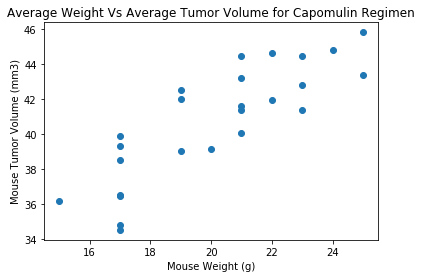

In [53]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
cap_mouse = capomulin_df.groupby("Mouse ID")
cap_mouse_vol = cap_mouse["Tumor Volume (mm3)"].mean()
cap_mouse_weight = cap_mouse["Weight (g)"].mean()
plt.scatter(cap_mouse_weight,cap_mouse_vol)

plt.title("Average Weight Vs Average Tumor Volume for Capomulin Regimen")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Mouse Tumor Volume (mm3)")

## Correlation and Regression

The correlation between both factors is 0.84


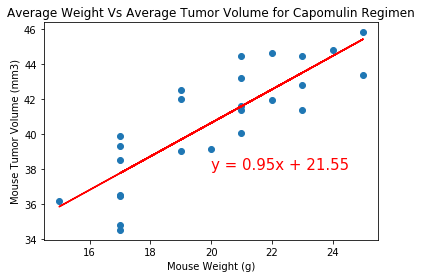

In [54]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
cap_mouse = capomulin_df.groupby("Mouse ID")
cap_mouse_vol = cap_mouse["Tumor Volume (mm3)"].mean()
cap_mouse_weight = cap_mouse["Weight (g)"].mean()
plt.scatter(cap_mouse_weight,cap_mouse_vol)

plt.title("Average Weight Vs Average Tumor Volume for Capomulin Regimen")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Mouse Tumor Volume (mm3)")
correlation = st.pearsonr(cap_mouse_weight,cap_mouse_vol)
print(f"The correlation between both factors is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(cap_mouse_weight, cap_mouse_vol)
regress_values = cap_mouse_weight * slope + intercept
line_eq = f"y = {(round(slope,2))}x + {round(intercept,2)}"
plt.plot(cap_mouse_weight,regress_values,"r-")
plt.annotate(line_eq,(20,38),fontsize=15,color="red")
plt.show()